In [1]:
from pyphm.datasets.milling import MillingPrepMethodA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import scipy.io as sio # for reading matlab files
import zipfile
import gdown
import os
import glob

import warnings
warnings.filterwarnings("ignore") # supress all the matplotlib deprecation warnings
from IPython.display import clear_output, display, Image # incase you want to clear the output of a cell
%load_ext autoreload
%autoreload 2

c:\Users\stajyer\tspipe\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path_colab = Path.cwd().parent.parent / 'content'

if path_colab.exists():
    proj_dir = Path.cwd()
else:
    proj_dir = Path.cwd().parent

print(proj_dir)

c:\Users\stajyer\tspipe


In [3]:
raw_data_dir = proj_dir / 'data' / 'raw'

mill = MillingPrepMethodA(root=raw_data_dir, download=False)
data = mill.load_mat()

raw_milling_data_dir = raw_data_dir / 'milling'
processed_data_dir = proj_dir / 'data' / 'processed'
sub_dir = proj_dir / 'data' / 'processed' / 'window1024_stride64_test'

WINDOW = 1024
STRIDE = 64

milling_data_window = MillingPrepMethodA(root=raw_data_dir, window_len=WINDOW, stride=STRIDE, download=True)

df = milling_data_window.create_xy_dataframe()

print("Shape: ", df.shape)

Path(sub_dir).mkdir(parents=True, exist_ok=True)

df.to_csv(sub_dir / 'milling_processed.csv.gz', compression='gzip', index=False)

Shape:  (9313280, 11)


In [3]:
sub_dir = proj_dir / 'data' / 'processed' / 'window1024_stride64_test'

df = pd.read_csv(sub_dir / 'milling_processed.csv.gz')
df.head()

,cut_id,cut_no,case,time,ae_spindle,ae_table,vib_spindle,vib_table,smcdc,smcac,tool_class
0,0_0,0,1,0.000,0.219727,0.272827,0.733643,2.116699,6.840820,0.124512,0
1,0_0,0,1,0.004,0.246582,0.322266,0.778809,2.277832,6.660156,-0.561523,0
2,0_0,0,1,0.008,0.294189,0.283813,0.758057,2.343750,6.508789,-2.099609,0
3,0_0,0,1,0.012,0.323486,0.260010,0.726318,2.448730,6.542969,-2.731934,0
4,0_0,0,1,0.016,0.290527,0.253296,0.653076,2.546387,6.621094,-3.505859,0


In [4]:
raw_data_dir = proj_dir / 'data' / 'raw'

raw_milling_data = pd.read_csv(raw_data_dir / 'milling' / 'mill.csv')
raw_milling_data = raw_milling_data.drop(['Unnamed: 0'], axis=1)

In [223]:
raw_milling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case         167 non-null    int64  
 1   run          167 non-null    int64  
 2   VB           146 non-null    float64
 3   time         167 non-null    int64  
 4   DOC          167 non-null    float64
 5   feed         167 non-null    float64
 6   material     167 non-null    int64  
 7   smcAC        167 non-null    float64
 8   smcDC        167 non-null    float64
 9   vib_table    167 non-null    float64
 10  vib_spindle  167 non-null    float64
 11  AE_table     167 non-null    float64
 12  AE_spindle   167 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 17.1 KB


In [36]:
raw_milling_data.describe()

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
count,167.000000,167.000000,146.000000,167.000000,167.000000,167.000000,167.000000,167.000000,1.670000e+02,1.670000e+02,167.000000,1.670000e+02,167.000000
mean,8.329341,7.167665,0.337603,26.113772,1.032934,0.372754,1.347305,-0.164495,1.336546e+00,7.948459e-02,0.285652,1.004229e-01,0.123872
std,4.764886,4.969367,0.260528,23.292643,0.364616,0.125356,0.477546,0.357721,1.893880e-01,3.654218e-02,0.030758,2.469953e-02,0.021194
min,1.000000,1.000000,0.000000,0.000000,0.750000,0.250000,1.000000,-0.798340,2.084677e-33,1.054677e-08,0.000003,4.074626e-11,0.000003
25%,3.000000,3.000000,0.150000,7.500000,0.750000,0.250000,1.000000,-0.551758,1.350098e+00,6.103516e-02,0.274658,9.277344e-02,0.110474
50%,10.000000,6.000000,0.285000,19.000000,0.750000,0.250000,1.000000,-0.156250,1.372070e+00,6.835938e-02,0.284424,1.019287e-01,0.122070
75%,12.000000,10.000000,0.467500,39.000000,1.500000,0.500000,2.000000,0.206299,1.391602e+00,8.300781e-02,0.297852,1.147461e-01,0.136414
max,16.000000,23.000000,1.530000,105.000000,1.500000,0.500000,2.000000,0.378418,1.450195e+00,2.929688e-01,0.391846,1.495361e-01,0.181274


In [37]:
raw_milling_data.isna().sum()

case            0
run             0
VB             21
time            0
DOC             0
feed            0
material        0
smcAC           0
smcDC           0
vib_table       0
vib_spindle     0
AE_table        0
AE_spindle      0
dtype: int64

In [52]:
### Pearson ###

pearson_corr = raw_milling_data.corr(method="pearson")

In [49]:
pearson_corr.style.background_gradient(cmap="coolwarm")

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
case,1.000000,-0.047886,0.253373,-0.109221,-0.160580,-0.194160,0.473620,-0.058081,0.162363,-0.477796,-0.182004,-0.029627,-0.110367
run,-0.047886,1.000000,0.625733,0.941573,-0.248264,-0.129943,-0.303920,-0.024212,0.204143,0.133830,-0.089062,0.105327,0.031430
VB,0.253373,0.625733,1.000000,0.509063,-0.033653,-0.019937,0.261415,-0.059403,0.149946,-0.110606,-0.254839,0.011542,-0.149821
time,-0.109221,0.941573,0.509063,1.000000,-0.258633,-0.156453,-0.443332,0.007973,0.206681,0.239667,-0.127997,0.184416,0.147960
DOC,-0.160580,-0.248264,-0.033653,-0.258633,1.000000,0.174614,-0.048788,0.021207,-0.148442,-0.096102,0.210296,0.024933,-0.059588
feed,-0.194160,-0.129943,-0.019937,-0.156453,0.174614,1.000000,-0.037209,0.104865,-0.198365,-0.233306,0.087499,-0.134397,-0.211765
material,0.473620,-0.303920,0.261415,-0.443332,-0.048788,-0.037209,1.000000,-0.010944,0.107970,-0.296074,0.006835,-0.282081,-0.256921
smcAC,-0.058081,-0.024212,-0.059403,0.007973,0.021207,0.104865,-0.010944,1.000000,-0.047164,0.161031,-0.034614,-0.026528,-0.068505
smcDC,0.162363,0.204143,0.149946,0.206681,-0.148442,-0.198365,0.107970,-0.047164,1.000000,0.095938,0.311706,0.195128,0.300523
vib_table,-0.477796,0.133830,-0.110606,0.239667,-0.096102,-0.233306,-0.296074,0.161031,0.095938,1.000000,0.077093,0.265829,0.383685


In [53]:
### Kendall ###

kendall_corr = raw_milling_data.corr(method="kendall")

In [50]:
kendall_corr.style.background_gradient(cmap="coolwarm")

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
case,1.000000,-0.054634,0.132062,-0.112893,-0.160001,-0.158933,0.435839,-0.045439,-0.096855,-0.359356,-0.184293,-0.078955,-0.093044
run,-0.054634,1.000000,0.576746,0.842698,-0.199826,-0.079325,-0.248990,-0.007019,0.251167,0.113295,-0.183083,0.031835,0.021630
VB,0.132062,0.576746,1.000000,0.505498,0.032256,0.029855,0.152082,0.005630,0.140898,-0.063339,-0.248042,-0.062952,-0.089705
time,-0.112893,0.842698,0.505498,1.000000,-0.183463,-0.102835,-0.381863,0.009877,0.255693,0.147650,-0.187404,0.110596,0.099874
DOC,-0.160001,-0.199826,0.032256,-0.183463,1.000000,0.174614,-0.048788,0.028081,-0.016605,-0.121611,0.166047,-0.025953,-0.066938
feed,-0.158933,-0.079325,0.029855,-0.102835,0.174614,1.000000,-0.037209,0.086777,-0.065438,-0.107170,0.139429,-0.165192,-0.186523
material,0.435839,-0.248990,0.152082,-0.381863,-0.048788,-0.037209,1.000000,-0.011885,-0.102629,-0.259647,-0.046896,-0.246162,-0.243497
smcAC,-0.045439,-0.007019,0.005630,0.009877,0.028081,0.086777,-0.011885,1.000000,0.188990,0.010596,-0.040865,-0.048563,-0.055061
smcDC,-0.096855,0.251167,0.140898,0.255693,-0.016605,-0.065438,-0.102629,0.188990,1.000000,0.046040,-0.062811,-0.010145,-0.013393
vib_table,-0.359356,0.113295,-0.063339,0.147650,-0.121611,-0.107170,-0.259647,0.010596,0.046040,1.000000,0.022381,0.135270,0.148678


In [54]:
### Spearman ###

spearman_corr = raw_milling_data.corr(method="spearman")

In [51]:
spearman_corr.style.background_gradient(cmap="coolwarm")

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
case,1.000000,-0.071892,0.195280,-0.159326,-0.188780,-0.187521,0.514235,-0.064788,-0.132589,-0.512118,-0.258515,-0.099497,-0.121757
run,-0.071892,1.000000,0.745307,0.952192,-0.236908,-0.094045,-0.295196,-0.007193,0.359337,0.168812,-0.254311,0.047977,0.033287
VB,0.195280,0.745307,1.000000,0.669358,0.039084,0.036174,0.184275,0.004023,0.212770,-0.091406,-0.358086,-0.090992,-0.134186
time,-0.159326,0.952192,0.669358,1.000000,-0.221547,-0.124182,-0.461133,0.011381,0.366659,0.223404,-0.264623,0.158800,0.144986
DOC,-0.188780,-0.236908,0.039084,-0.221547,1.000000,0.174614,-0.048788,0.034214,-0.019887,-0.145189,0.200984,-0.031526,-0.081376
feed,-0.187521,-0.094045,0.036174,-0.124182,0.174614,1.000000,-0.037209,0.105729,-0.078369,-0.127949,0.168767,-0.200667,-0.226755
material,0.514235,-0.295196,0.184275,-0.461133,-0.048788,-0.037209,1.000000,-0.014480,-0.122908,-0.309989,-0.056763,-0.299025,-0.296018
smcAC,-0.064788,-0.007193,0.004023,0.011381,0.034214,0.105729,-0.014480,1.000000,0.283063,0.014430,-0.055569,-0.071661,-0.081625
smcDC,-0.132589,0.359337,0.212770,0.366659,-0.019887,-0.078369,-0.122908,0.283063,1.000000,0.071636,-0.091360,-0.011405,-0.018348
vib_table,-0.512118,0.168812,-0.091406,0.223404,-0.145189,-0.127949,-0.309989,0.014430,0.071636,1.000000,0.038466,0.195722,0.215589


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9313280 entries, 0 to 9313279
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   cut_id       object 
 1   cut_no       int64  
 2   case         int64  
 3   time         float64
 4   ae_spindle   float64
 5   ae_table     float64
 6   vib_spindle  float64
 7   vib_table    float64
 8   smcdc        float64
 9   smcac        float64
 10  tool_class   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 781.6+ MB


In [4]:
df.describe()

,cut_no,case,time,ae_spindle,ae_table,vib_spindle,vib_table,smcdc,smcac,tool_class
count,9.313280e+06,9.313280e+06,9.313280e+06,9.313280e+06,9.313280e+06,9.313280e+06,9.313280e+06,9.313280e+06,9.313280e+06,9.313280e+06
mean,8.302804e+01,8.322265e+00,2.046000e+00,2.449860e-01,2.044290e-01,3.138266e-01,9.695972e-01,7.375682e+00,-1.572128e-01,7.089610e-01
std,4.794389e+01,4.719888e+00,1.182413e+00,9.098135e-02,7.263016e-02,7.656384e-02,3.957817e-01,2.042010e+00,2.093879e+00,5.935905e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,9.094238e-02,1.220703e-02,2.160644e-01,1.904297e-01,3.417969e+00,-6.967773e+00,0.000000e+00
25%,4.200000e+01,3.000000e+00,1.023000e+00,1.782227e-01,1.544189e-01,2.734375e-01,6.909180e-01,5.712891e+00,-1.784668e+00,0.000000e+00
50%,8.200000e+01,1.000000e+01,2.046000e+00,2.227783e-01,1.916504e-01,2.905273e-01,9.033203e-01,7.338867e+00,-1.489258e-01,1.000000e+00
75%,1.250000e+02,1.200000e+01,3.069000e+00,2.917480e-01,2.459717e-01,3.173828e-01,1.159668e+00,9.599609e+00,1.464844e+00,1.000000e+00
max,1.660000e+02,1.600000e+01,4.092000e+00,9.790039e-01,6.121826e-01,1.657715e+00,2.861328e+00,9.995117e+00,6.777344e+00,2.000000e+00


In [5]:
df.isna().sum()

cut_id         0
cut_no         0
case           0
time           0
ae_spindle     0
ae_table       0
vib_spindle    0
vib_table      0
smcdc          0
smcac          0
tool_class     0
dtype: int64

In [5]:
# --- EXAMPLE 1 ---

from tsfresh import feature_extraction

sub_dir = proj_dir / 'data' / 'processed' / 'window1024_stride64_test'
window_processed_dir = sub_dir #after data windowing
file_name = 'milling_features.csv' #the name of the file to save the features in
window_file_name = 'milling_processed.csv'

list_of_features = {
    "root_mean_square": None,
    "mean": None,
    "kurtosis": None
}

df_raw_labels = df[['cut_id', 'cut_no', 'case', 'tool_class']].drop_duplicates().copy()

df_features = feature_extraction.extract_features(df, column_id="cut_id", column_sort="time", default_fc_parameters=list_of_features, disable_progressbar=False, n_jobs=4)
df_new_features = df_features.reset_index().rename(columns={'index':'cut_id'}).merge(df_raw_labels, on='cut_id', how='left')

df_new_features.head()

Feature Extraction: 100%|██████████| 20/20 [00:18<00:00,  1.06it/s]


,cut_id,cut_no__root_mean_square,cut_no__mean,cut_no__kurtosis,case__root_mean_square,case__mean,case__kurtosis,ae_spindle__root_mean_square,ae_spindle__mean,ae_spindle__kurtosis,...,smcdc__kurtosis,smcac__root_mean_square,smcac__mean,smcac__kurtosis,tool_class__root_mean_square,tool_class__mean,tool_class__kurtosis,cut_no,case,tool_class
0,0_0,0.0,0.0,0.0,1.0,1.0,0.0,0.218442,0.213459,0.362453,...,-0.017042,1.835022,-0.193081,-1.266514,0.0,0.0,0.0,0,1,0
1,0_1,0.0,0.0,0.0,1.0,1.0,0.0,0.216922,0.212069,0.487595,...,-0.042394,1.832819,-0.162208,-1.256077,0.0,0.0,0.0,0,1,0
2,0_10,0.0,0.0,0.0,1.0,1.0,0.0,0.211146,0.207769,0.439928,...,-0.061250,1.824547,-0.180714,-1.265339,0.0,0.0,0.0,0,1,0
3,0_11,0.0,0.0,0.0,1.0,1.0,0.0,0.210489,0.207282,0.426394,...,-0.062503,1.819315,-0.184751,-1.267439,0.0,0.0,0.0,0,1,0
4,0_12,0.0,0.0,0.0,1.0,1.0,0.0,0.210593,0.207503,0.502707,...,-0.083880,1.816610,-0.136020,-1.259084,0.0,0.0,0.0,0,1,0


In [6]:
# --- EXAMPLE 2 ---

from tsfresh import feature_extraction

sub_dir = proj_dir / 'data' / 'processed' / 'window1024_stride64_test'
window_processed_dir = sub_dir #after data windowing
file_name = 'milling_features.csv' #the name of the file to save the features in
window_file_name = 'milling_processed.csv'

list_of_features = {
    "fft_coefficient": [{"coeff": 5, "attr": s} for s in ["real", "imag", "abs", "angle"]]
}

df_raw_labels = df[['cut_id', 'cut_no', 'case', 'tool_class']].drop_duplicates().copy()

df_features = feature_extraction.extract_features(df, column_id="cut_id", column_sort="time", default_fc_parameters=list_of_features, disable_progressbar=False, n_jobs=4)
df_new_features = df_features.reset_index().rename(columns={'index':'cut_id'}).merge(df_raw_labels, on='cut_id', how='left')

df_new_features.head()

Feature Extraction: 100%|██████████| 20/20 [00:13<00:00,  1.46it/s]


,cut_id,"cut_no__fft_coefficient__attr_""real""__coeff_5","cut_no__fft_coefficient__attr_""imag""__coeff_5","cut_no__fft_coefficient__attr_""abs""__coeff_5","cut_no__fft_coefficient__attr_""angle""__coeff_5","case__fft_coefficient__attr_""real""__coeff_5","case__fft_coefficient__attr_""imag""__coeff_5","case__fft_coefficient__attr_""abs""__coeff_5","case__fft_coefficient__attr_""angle""__coeff_5","ae_spindle__fft_coefficient__attr_""real""__coeff_5",...,"smcac__fft_coefficient__attr_""imag""__coeff_5","smcac__fft_coefficient__attr_""abs""__coeff_5","smcac__fft_coefficient__attr_""angle""__coeff_5","tool_class__fft_coefficient__attr_""real""__coeff_5","tool_class__fft_coefficient__attr_""imag""__coeff_5","tool_class__fft_coefficient__attr_""abs""__coeff_5","tool_class__fft_coefficient__attr_""angle""__coeff_5",cut_no,case,tool_class
0,0_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.410935,...,37.844972,64.889541,35.677442,0.0,0.0,0.0,0.0,0,1,0
1,0_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.292361,...,68.351345,88.072253,129.096710,0.0,0.0,0.0,0.0,0,1,0
2,0_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.518225,...,-77.430252,79.462937,-77.012652,0.0,0.0,0.0,0.0,0,1,0
3,0_11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.771915,...,44.369712,69.037336,39.992815,0.0,0.0,0.0,0.0,0,1,0
4,0_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466645,...,62.011007,74.819206,124.023173,0.0,0.0,0.0,0.0,0,1,0


In [7]:
# --- EXAMPLE 3 ---

from tsfresh import feature_extraction

sub_dir = proj_dir / 'data' / 'processed' / 'window1024_stride64_test'
window_processed_dir = sub_dir #after data windowing
file_name = 'milling_features.csv' #the name of the file to save the features in
window_file_name = 'milling_processed.csv'

list_of_features = {
    "cwt_coefficients": [{"widths": width, "coeff": coeff, "w": w} for
                             width in [(2, 5, 10, 20)] for coeff in range(15) for w in (2, 5, 10, 20)],
}

df_raw_labels = df[['cut_id', 'cut_no', 'case', 'tool_class']].drop_duplicates().copy()

df_features = feature_extraction.extract_features(df, column_id="cut_id", column_sort="time", default_fc_parameters=list_of_features, disable_progressbar=False, n_jobs=4)
df_new_features = df_features.reset_index().rename(columns={'index':'cut_id'}).merge(df_raw_labels, on='cut_id', how='left')

df_new_features.head()

Feature Extraction: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]


,cut_id,"cut_no__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","cut_no__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","cut_no__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","cut_no__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","cut_no__cwt_coefficients__coeff_1__w_2__widths_(2, 5, 10, 20)","cut_no__cwt_coefficients__coeff_1__w_5__widths_(2, 5, 10, 20)","cut_no__cwt_coefficients__coeff_1__w_10__widths_(2, 5, 10, 20)","cut_no__cwt_coefficients__coeff_1__w_20__widths_(2, 5, 10, 20)","cut_no__cwt_coefficients__coeff_2__w_2__widths_(2, 5, 10, 20)",...,"tool_class__cwt_coefficients__coeff_13__w_5__widths_(2, 5, 10, 20)","tool_class__cwt_coefficients__coeff_13__w_10__widths_(2, 5, 10, 20)","tool_class__cwt_coefficients__coeff_13__w_20__widths_(2, 5, 10, 20)","tool_class__cwt_coefficients__coeff_14__w_2__widths_(2, 5, 10, 20)","tool_class__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)","tool_class__cwt_coefficients__coeff_14__w_10__widths_(2, 5, 10, 20)","tool_class__cwt_coefficients__coeff_14__w_20__widths_(2, 5, 10, 20)",cut_no,case,tool_class
0,0_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,0_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
2,0_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
3,0_11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
4,0_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0


In [9]:
from tsfresh import feature_extraction

window_processed_dir = sub_dir #after data windowing
file_name = 'milling_features.csv' #the name of the file to save the features in
window_file_name = 'milling_processed.csv'

list_of_features = {
    "abs_energy": None,
    "absolute_sum_of_changes": None,
    "agg_autocorrelation": [{"f_agg": s, "maxlag": 35} for s in ["mean", "median", "var"]],
    "agg_linear_trend": [{"f_agg": s, "attr": n, "chunk_len": 10} for s in ["max", "min", "mean", "var"]
                           for n in ["pvalue", "rvalue", "intercept", "slope", "stderr"]],
    "approximate_entropy": [{"m": 2, "r": r} for r in [0.2, 0.5, 0.9]],
    #"autocorrelation": [{"lag": 50}], #AttributeError: `np.NaN` was removed in the NumPy 2.0 release. Use `np.nan` instead.
    "benford_correlation": None,
    "binned_entropy": [{"max_bins": 10}],
    "c3": [{"lag": 50}],
    "cid_ce": [{"normalize": True, "normalize": False}],
    "count_above": [{"t": 0}],
    "count_above_mean": None,
    "count_below": [{"t": 0}],
    "count_above_mean": None,
    #"cwt_coefficients",
    #"energy_ratio_by_chunks",
    "fft_aggregated": [{"aggtype": s} for s in ["centroid", "variance", "skew", "kurtosis"]],
    "fft_coefficient": [{"coeff": 5, "attr": s} for s in ["real", "imag", "abs", "angle"]],
    "fourier_entropy": [{"bins": s} for s in [2, 4, 7, 10, 50, 100]],
    #"friedrich_coefficients",
    #"index_mass_quantile": [{"q": 0.5}], #AttributeError: `np.NaN` was removed in the NumPy 2.0 release. Use `np.nan` instead.
    "kurtosis": None,
    "large_standard_deviation": [{"r": r} for r in [0.1, 0.3, 0.5, 0.7, 0.9]],
    #"lempel_ziv_complexity",
    "length": None,
    "linear_trend": [{"attr": s} for s in ["pvalue", "rvalue", "intercept", "slope", "stderr"]],
    "linear_trend_timewise": [{"attr": s} for s in ["pvalue", "rvalue", "intercept", "slope", "stderr"]],
    #"matrix_profile": [{"sample_pct": x, "threshold": 0.98, "feature": z} for x in [0.2, 0.4, 0.6, 0.8, 1]
    #                      for z in ["min", "max", "mean", "median", "25", "75"]], #ImportError, matrixprofile required.
    #"max_langevin_fixed_point",
    "maximum": None,
    "mean": None,
    "mean_abs_change": None,
    "mean_change": None,
    "mean_second_derivative_central": None,
    "median": None,
    "minimum": None,
    "number_crossing_m": [{"m": -1}, {"m": 0}, {"m": 1}],
    "number_cwt_peaks": [{"n": 3}],
    "number_peaks": [{"n": n} for n in [3, 5, 10, 30, 50]],
    #"partial_autocorrelation",
    #"permutation_entropy",
    "quantile": [{"q": q} for q in [0.1, 0.3, 0.5, 0.7, 0.9]],
    #"ratio_beyond_r_sigma",
    "root_mean_square": None,
    "sample_entropy": None,
    "skewness": None,
    #"spkt_welch_density",
    "standard_deviation": None,
    #"symmetry_looking",
    #"time_reversal_asymmetry_statistic",
    "variance": None,
    "variation_coefficient": None,
}

df_raw_labels = df[['cut_id', 'cut_no', 'case', 'tool_class']].drop_duplicates().copy()

df_features = feature_extraction.extract_features(df, column_id="cut_id", column_sort="time", default_fc_parameters=list_of_features, disable_progressbar=False, n_jobs=4)
df_new_features = df_features.reset_index().rename(columns={'index':'cut_id'}).merge(df_raw_labels, on='cut_id', how='left')

df_new_features.to_csv(window_processed_dir / file_name, index=False)

Feature Extraction:   0%|          | 0/20 [00:00<?, ?it/s]

In [6]:
path_processed_dir = proj_dir / 'data' / 'processed' / 'window1024_stride64_test'
path_processed_dir.mkdir(parents=True, exist_ok=True)

In [6]:
zip_file_name = 'milling_features_comp_stride64_len1024.zip'

gdown.download(
    id='1I0OjXVSkBBxhw3w8KtWbITRR0yAeKk8j', 
    output=str(path_processed_dir / zip_file_name), 
    quiet=False
    )

with zipfile.ZipFile(path_processed_dir / zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(path_processed_dir)

Downloading...
From (original): https://drive.google.com/uc?id=1I0OjXVSkBBxhw3w8KtWbITRR0yAeKk8j
From (redirected): https://drive.google.com/uc?id=1I0OjXVSkBBxhw3w8KtWbITRR0yAeKk8j&confirm=t&uuid=b2ac7667-9efa-4f37-83d2-c16a06478a0e
To: c:\Users\stajyer\tspipe\data\processed\window1024_stride64_test\milling_features_comp_stride64_len1024.zip
100%|██████████| 321M/321M [00:35<00:00, 9.02MB/s] 


In [7]:
df_features_downloaded = pd.read_csv(path_processed_dir / 'milling_features_comp_stride64_len1024.csv')
df_features_downloaded.head()


,cut_id,smcac__time_reversal_asymmetry_statistic__lag_1,smcac__time_reversal_asymmetry_statistic__lag_2,smcac__time_reversal_asymmetry_statistic__lag_3,smcac__c3__lag_1,smcac__c3__lag_2,smcac__c3__lag_3,smcac__cid_ce__normalize_True,smcac__cid_ce__normalize_False,smcac__symmetry_looking__r_0.0,...,smcdc__query_similarity_count__query_None__threshold_0.0,"smcdc__matrix_profile__feature_""min""__threshold_0.98","smcdc__matrix_profile__feature_""max""__threshold_0.98","smcdc__matrix_profile__feature_""mean""__threshold_0.98","smcdc__matrix_profile__feature_""median""__threshold_0.98","smcdc__matrix_profile__feature_""25""__threshold_0.98","smcdc__matrix_profile__feature_""75""__threshold_0.98",cut_no,case,tool_class
0,87_20,-0.009862,-0.008820,0.002745,-0.997182,-0.733741,-0.354140,11.424614,17.725740,0.0,...,NaN,3.789384,5.941307,4.691854,4.617381,3.912163,5.372661,87,11,1
1,87_21,-0.014233,-0.006940,0.003651,-1.006841,-0.739986,-0.355168,11.403917,17.642734,0.0,...,NaN,3.022031,5.579988,3.749164,3.582706,3.339192,4.022824,87,11,1
2,87_22,-0.023152,-0.024342,-0.000312,-1.067194,-0.764072,-0.354402,11.388923,17.604872,0.0,...,NaN,2.896524,5.421811,3.517452,3.349038,3.180649,3.620394,87,11,1
3,87_23,-0.008329,-0.001119,0.017044,-1.070455,-0.782522,-0.374350,11.327472,17.496560,0.0,...,NaN,2.866619,5.212993,3.357202,3.245255,3.119372,3.488481,87,11,1
4,87_24,0.006926,0.018749,0.019649,-1.014428,-0.744961,-0.359926,11.280507,17.361086,0.0,...,NaN,2.866619,4.435201,3.249217,3.202348,3.032700,3.403513,87,11,1


In [8]:
print(df_features_downloaded.columns)

Index(['cut_id', 'smcac__time_reversal_asymmetry_statistic__lag_1',
       'smcac__time_reversal_asymmetry_statistic__lag_2',
       'smcac__time_reversal_asymmetry_statistic__lag_3', 'smcac__c3__lag_1',
       'smcac__c3__lag_2', 'smcac__c3__lag_3', 'smcac__cid_ce__normalize_True',
       'smcac__cid_ce__normalize_False', 'smcac__symmetry_looking__r_0.0',
       ...
       'smcdc__query_similarity_count__query_None__threshold_0.0',
       'smcdc__matrix_profile__feature_"min"__threshold_0.98',
       'smcdc__matrix_profile__feature_"max"__threshold_0.98',
       'smcdc__matrix_profile__feature_"mean"__threshold_0.98',
       'smcdc__matrix_profile__feature_"median"__threshold_0.98',
       'smcdc__matrix_profile__feature_"25"__threshold_0.98',
       'smcdc__matrix_profile__feature_"75"__threshold_0.98', 'cut_no', 'case',
       'tool_class'],
      dtype='object', length=4510)


In [8]:
# get the percentage of each tool_class
df_p = df_features_downloaded.groupby("tool_class").size() / df_features_downloaded.shape[0] * 100
df_p = df_p.reset_index()
df_p.columns = ["tool_class", "percentage"]

# get the count of each tool_class
df_c = df_features_downloaded.groupby("tool_class").size().to_frame().reset_index()
df_c.columns = ["tool_class", "count"]

# merge the two dataframes
df_pc = df_p.merge(df_c, on="tool_class")[["tool_class", "count", "percentage"]]
df_pc["percentage"] = df_pc["percentage"].round(2)
df_pc

,tool_class,count,percentage
0,0,3311,36.63
1,1,5065,56.03
2,2,664,7.35


In [9]:
### Turning the results into a binary classification problem. ###

df_b = {'tool_class': [0, 1], 
        'count': [df_pc['count'][0] + df_pc['count'][1], df_pc['count'][2]], 
        'percentage': [df_pc['percentage'][0] + df_pc['percentage'][1], df_pc['percentage'][2]]}

df_b = pd.DataFrame(data=df_b)
df_b

,tool_class,count,percentage
0,0,8376,92.66
1,1,664,7.35


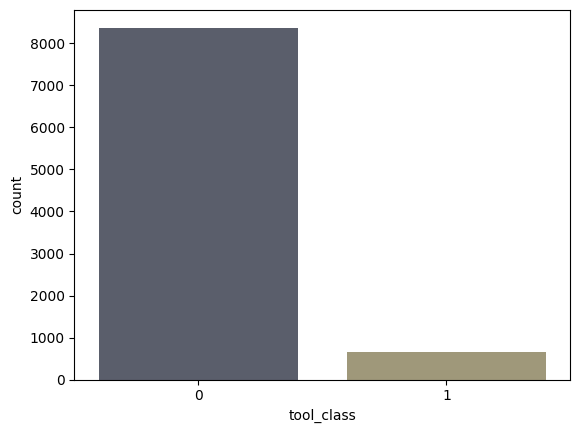

In [16]:
tool_bar_plot = sns.barplot(x="tool_class", y="count", data = df_b, palette="cividis")

fig = tool_bar_plot.get_figure()
fig.savefig("tool_bar_plot.png")

In [10]:
df_features_downloaded_b = df_features_downloaded
df_features_downloaded_b = df_features_downloaded_b.replace(1, 0)
df_features_downloaded_b = df_features_downloaded_b.replace(2, 1)

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from tsfresh.feature_selection import select_features
from tsfresh.feature_selection.relevance import calculate_relevance_table

imp = SimpleImputer(strategy='most_frequent')

df_features_downloaded_b = df_features_downloaded_b.dropna(axis=1, how='all')

imputed_df_tool_class = df_features_downloaded_b['tool_class']

imputed_df = imp.fit_transform(df_features_downloaded_b.drop(columns=['tool_class']))

scaler = StandardScaler()
imputed_df_sc = scaler.fit_transform(imputed_df)

imputed_df_sc = pd.DataFrame(imputed_df_sc, columns=df_features_downloaded_b.drop(columns=['tool_class']).columns)

relevance_table = calculate_relevance_table(imputed_df_sc, imputed_df_tool_class)

print(relevance_table)

relevance_table = relevance_table.sort_values("p_value", inplace=True)

                                                                                              feature  \
feature                                                                                                 
vib_spindle__quantile__q_0.7                                             vib_spindle__quantile__q_0.7   
vib_spindle__quantile__q_0.6                                             vib_spindle__quantile__q_0.6   
vib_spindle__fft_coefficient__attr_"abs"__coeff_0   vib_spindle__fft_coefficient__attr_"abs"__coeff_0   
vib_spindle__fft_coefficient__attr_"real"__coeff_0  vib_spindle__fft_coefficient__attr_"real"__coe...   
vib_spindle__quantile__q_0.8                                             vib_spindle__quantile__q_0.8   
...                                                                                               ...   
smcdc__number_crossing_m__m_0                                           smcdc__number_crossing_m__m_0   
smcdc__number_crossing_m__m_-1                         

In [12]:
df_selected = select_features(imputed_df_sc, imputed_df_tool_class)

print(df_selected)

      vib_spindle__quantile__q_0.7  vib_spindle__quantile__q_0.6  \
0                        -0.603003                     -0.603893   
1                        -0.603003                     -0.603893   
2                        -0.589502                     -0.603893   
3                        -0.589502                     -0.603893   
4                        -0.589502                     -0.603893   
...                            ...                           ...   
9035                     -0.514499                     -0.525499   
9036                     -0.514499                     -0.525499   
9037                     -0.529500                     -0.525499   
9038                     -0.529500                     -0.525499   
9039                     -0.529500                     -0.525499   

      vib_spindle__fft_coefficient__attr_"abs"__coeff_0  \
0                                             -0.609765   
1                                             -0.608637   
2     

In [13]:
### OVERSAMPLING ###

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.impute import SimpleImputer

ros = RandomOverSampler(random_state=10)
sm = SMOTE(random_state=10)
ada = ADASYN(random_state=10)

imp = SimpleImputer(strategy='most_frequent')

df_features_downloaded_b = df_features_downloaded_b.dropna(axis=1, how='all')

imputed_df_tool_class = df_features_downloaded_b['tool_class']

imputed_df = imp.fit_transform(df_features_downloaded_b.drop(columns=['tool_class']))

x_over_ros, y_over_ros = ros.fit_resample(imputed_df, df_features_downloaded_b['tool_class'])
#x_over_sm, _ = sm.fit_resample(imputed_df, imputed_df_tool_class)
#x_over_ada, _ = ada.fit_resample(imputed_df, imputed_df_tool_class)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_over_ros)

x_over_ros_sc = pd.DataFrame(scaler.transform(x_over_ros), columns=df_features_downloaded_b.drop(columns=['tool_class']).columns)

x_over_ros_sc

,cut_id,smcac__time_reversal_asymmetry_statistic__lag_1,smcac__time_reversal_asymmetry_statistic__lag_2,smcac__time_reversal_asymmetry_statistic__lag_3,smcac__c3__lag_1,smcac__c3__lag_2,smcac__c3__lag_3,smcac__cid_ce__normalize_True,smcac__cid_ce__normalize_False,smcac__symmetry_looking__r_0.0,...,smcdc__permutation_entropy__dimension_6__tau_1,smcdc__permutation_entropy__dimension_7__tau_1,"smcdc__matrix_profile__feature_""min""__threshold_0.98","smcdc__matrix_profile__feature_""max""__threshold_0.98","smcdc__matrix_profile__feature_""mean""__threshold_0.98","smcdc__matrix_profile__feature_""median""__threshold_0.98","smcdc__matrix_profile__feature_""25""__threshold_0.98","smcdc__matrix_profile__feature_""75""__threshold_0.98",cut_no,case
0,0.005281,-0.064031,-0.330596,-0.270172,0.910959,0.955820,0.943897,-0.811124,-1.007431,0.0,...,0.726078,0.762212,-0.865334,-0.978462,-0.919387,-0.908512,-0.904662,-0.922300,-0.349427,0.244375
1,0.005462,-0.125797,-0.315086,-0.265923,0.904871,0.948870,0.938162,-0.881854,-1.015975,0.0,...,0.725034,0.758272,-0.894621,-0.993872,-0.956442,-0.948887,-0.926894,-0.975067,-0.349427,0.244375
2,0.005642,-0.251839,-0.458608,-0.284497,0.866834,0.922066,0.942438,-0.933097,-1.019873,0.0,...,0.725134,0.759159,-0.899411,-1.000619,-0.965550,-0.958005,-0.933045,-0.990798,-0.349427,0.244375
3,0.005823,-0.042369,-0.267083,-0.203166,0.864779,0.901533,0.831145,-1.143098,-1.031023,0.0,...,0.722756,0.755622,-0.900552,-1.009525,-0.971849,-0.962055,-0.935423,-0.995955,-0.349427,0.244375
4,0.006003,0.173202,-0.103218,-0.190956,0.900090,0.943333,0.911615,-1.303594,-1.044969,0.0,...,0.731669,0.765674,-0.900552,-1.042698,-0.976093,-0.963729,-0.938786,-0.999276,-0.349427,0.244375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16747,1.015109,-0.109907,-0.568417,-1.396828,-0.231761,-0.134101,0.383120,0.709539,0.468790,0.0,...,-1.190175,-1.190860,1.175822,1.050642,1.147380,1.146158,1.165685,1.106467,0.850306,0.688409
16748,0.985323,0.277547,0.083826,0.165953,0.181276,0.081014,-0.421391,0.168442,-0.021759,0.0,...,0.816843,0.820986,-0.839736,-0.958793,-0.897706,-0.873653,-0.873945,-0.911926,0.807458,0.688409
16749,-1.362698,3.556246,2.161577,0.090074,-2.258203,-2.121466,-0.776110,1.962006,2.425021,0.0,...,-1.190175,-1.190860,1.175822,1.050642,1.147380,1.146158,1.165685,1.106467,0.229015,-1.087727
16750,0.964022,0.328105,0.241929,0.117398,0.174766,0.162855,-0.133696,-0.339357,-0.235797,0.0,...,0.816751,0.827353,-0.870845,-1.051815,-0.950531,-0.936816,-0.909958,-0.974777,0.786034,0.688409


In [15]:
from tsfresh.feature_selection import select_features
from tsfresh.feature_selection.relevance import calculate_relevance_table

print(x_over_ros_sc.shape)
print(y_over_ros.shape)

ros_relevance_table = calculate_relevance_table(x_over_ros_sc, y_over_ros)
print(ros_relevance_table)

ros_relevance_table = ros_relevance_table.sort_values("p_value", inplace=True)

(16752, 4503)
(16752,)
                                                                                              feature  \
feature                                                                                                 
cut_id                                                                                         cut_id   
vib_spindle__cwt_coefficients__coeff_10__w_10__...  vib_spindle__cwt_coefficients__coeff_10__w_10_...   
vib_spindle__cwt_coefficients__coeff_10__w_5__w...  vib_spindle__cwt_coefficients__coeff_10__w_5__...   
vib_spindle__cwt_coefficients__coeff_9__w_20__w...  vib_spindle__cwt_coefficients__coeff_9__w_20__...   
vib_spindle__cwt_coefficients__coeff_9__w_10__w...  vib_spindle__cwt_coefficients__coeff_9__w_10__...   
...                                                                                               ...   
smcdc__number_crossing_m__m_0                                           smcdc__number_crossing_m__m_0   
smcdc__number_crossing_m__m_-1  

In [16]:
df_selected_ros = select_features(x_over_ros_sc, y_over_ros)

print(df_selected_ros)

         cut_id  \
0      0.005281   
1      0.005462   
2      0.005642   
3      0.005823   
4      0.006003   
...         ...   
16747  1.015109   
16748  0.985323   
16749 -1.362698   
16750  0.964022   
16751  0.116842   

       vib_spindle__cwt_coefficients__coeff_10__w_10__widths_(2, 5, 10, 20)  \
0                                              -0.121565                      
1                                              -0.659122                      
2                                              -0.234227                      
3                                              -0.482872                      
4                                              -0.378741                      
...                                                  ...                      
16747                                          -0.210118                      
16748                                          -0.494697                      
16749                                          -0.844879    

In [17]:
### UNDERSAMPLING ###

from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer

rus = RandomUnderSampler(random_state=10)

imp = SimpleImputer(strategy='most_frequent')

df_features_downloaded_b = df_features_downloaded_b.dropna(axis=1, how='all')

imputed_df_tool_class = df_features_downloaded_b['tool_class']

imputed_df = imp.fit_transform(df_features_downloaded_b.drop(columns=['tool_class']))

x_under_rus, y_under_rus = rus.fit_resample(imputed_df, df_features_downloaded_b['tool_class'])

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_under_rus)

x_under_rus_sc = pd.DataFrame(scaler.transform(x_under_rus), columns=df_features_downloaded_b.drop(columns=['tool_class']).columns)

In [19]:
from tsfresh.feature_selection import select_features
from tsfresh.feature_selection.relevance import calculate_relevance_table

print(x_under_rus_sc.shape)
print(y_under_rus.shape)

y_under_rus = y_under_rus.reset_index(drop=True)

print(x_under_rus_sc.sort_index().index)
print(y_under_rus.sort_index().index)

ros_relevance_table = calculate_relevance_table(x_under_rus_sc, y_under_rus)
print(ros_relevance_table)

ros_relevance_table = ros_relevance_table.sort_values("p_value", inplace=True)

(1328, 4503)
(1328,)
RangeIndex(start=0, stop=1328, step=1)
RangeIndex(start=0, stop=1328, step=1)
                                                                                              feature  \
feature                                                                                                 
smcdc__agg_linear_trend__attr_"intercept"__chun...  smcdc__agg_linear_trend__attr_"intercept"__chu...   
smcdc__quantile__q_0.1                                                         smcdc__quantile__q_0.1   
smcdc__fft_coefficient__attr_"abs"__coeff_12             smcdc__fft_coefficient__attr_"abs"__coeff_12   
smcdc__agg_linear_trend__attr_"intercept"__chun...  smcdc__agg_linear_trend__attr_"intercept"__chu...   
smcdc__agg_linear_trend__attr_"intercept"__chun...  smcdc__agg_linear_trend__attr_"intercept"__chu...   
...                                                                                               ...   
smcdc__number_crossing_m__m_0                                

In [20]:
df_selected_rus = select_features(x_under_rus_sc, y_under_rus)

print(df_selected_rus)

      smcdc__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"min"  \
0                                             -2.022682                      
1                                             -2.176545                      
2                                              0.113014                      
3                                              0.900918                      
4                                              0.900918                      
...                                                 ...                      
1323                                          -0.425996                      
1324                                          -0.581758                      
1325                                          -0.574315                      
1326                                          -0.570594                      
1327                                          -0.562790                      

      smcdc__quantile__q_0.1  smcdc__fft_coefficient__attr_"abs

In [21]:
### HYBRID ###

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

rush = RandomUnderSampler(random_state=14, sampling_strategy=0.5)

imp = SimpleImputer(strategy='most_frequent')

df_features_downloaded_b = df_features_downloaded_b.dropna(axis=1, how='all')

imputed_df_tool_class = df_features_downloaded_b['tool_class']

imputed_df = imp.fit_transform(df_features_downloaded_b.drop(columns=['tool_class']))

x_under_rush, y_under_rush = rush.fit_resample(imputed_df, df_features_downloaded_b['tool_class'])

rosh = RandomOverSampler(random_state=14, sampling_strategy=1)

x_over_rosh, y_over_rosh = rush.fit_resample(x_under_rush, y_under_rush)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_over_rosh)

x_over_rosh_sc = pd.DataFrame(scaler.transform(x_over_rosh), columns=df_features_downloaded_b.drop(columns=['tool_class']).columns)

In [23]:
from tsfresh.feature_selection import select_features
from tsfresh.feature_selection.relevance import calculate_relevance_table

print(x_over_rosh_sc.shape)
print(y_over_rosh.shape)

y_over_rosh = y_over_rosh.reset_index(drop=True)

print(x_over_rosh_sc.sort_index().index)
print(y_over_rosh.sort_index().index)

ros_relevance_table = calculate_relevance_table(x_over_rosh_sc, y_over_rosh)
print(ros_relevance_table)

ros_relevance_table = ros_relevance_table.sort_values("p_value", inplace=True)

(1992, 4503)
(1992,)
RangeIndex(start=0, stop=1992, step=1)
RangeIndex(start=0, stop=1992, step=1)
                                                                                              feature  \
feature                                                                                                 
vib_spindle__quantile__q_0.7                                             vib_spindle__quantile__q_0.7   
vib_spindle__quantile__q_0.8                                             vib_spindle__quantile__q_0.8   
vib_spindle__c3__lag_1                                                         vib_spindle__c3__lag_1   
vib_spindle__fft_coefficient__attr_"real"__coeff_0  vib_spindle__fft_coefficient__attr_"real"__coe...   
vib_spindle__fft_coefficient__attr_"abs"__coeff_0   vib_spindle__fft_coefficient__attr_"abs"__coeff_0   
...                                                                                               ...   
smcdc__number_crossing_m__m_0                                

In [24]:
df_selected_rosh = select_features(x_over_rosh_sc, y_over_rosh)

print(df_selected_rosh)

      vib_spindle__quantile__q_0.7  vib_spindle__quantile__q_0.8  \
0                        -0.526105                     -0.524518   
1                         0.051683                      0.030182   
2                        -0.328007                     -0.334335   
3                        -0.014350                     -0.017363   
4                        -0.129908                     -0.137813   
...                            ...                           ...   
1987                     -0.443564                     -0.445275   
1988                     -0.476581                     -0.461124   
1989                     -0.476581                     -0.461124   
1990                     -0.476581                     -0.461124   
1991                     -0.476581                     -0.445275   

      vib_spindle__c3__lag_1  \
0                  -0.363707   
1                  -0.093201   
2                  -0.282572   
3                  -0.142688   
4                  -0.1

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit(imputed_df)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.42627088 0.18959323]
[498649.39864188 332555.30496184]


MODEL

In [88]:
### Imputed Raw Data ###
from sklearn.model_selection import train_test_split

#Forward selection

X = df_selected.iloc[:,:5]
y = imputed_df_tool_class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.head()

,vib_spindle__quantile__q_0.7,vib_spindle__quantile__q_0.6,"vib_spindle__fft_coefficient__attr_""abs""__coeff_0","vib_spindle__fft_coefficient__attr_""real""__coeff_0",vib_spindle__quantile__q_0.8
6354,0.927056,0.948303,0.960278,0.960278,0.923971
1541,0.237029,0.227081,0.190128,0.190128,0.247192
3133,1.150564,1.183484,1.201322,1.201322,1.125565
322,-0.019480,-0.008101,0.001530,0.001530,-0.040800
2031,-0.184487,-0.180567,-0.172324,-0.172324,-0.184795


In [129]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

classifiers = {

    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier()

}

results_raw = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores = cross_val_score(clf, X, y, cv=5)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    cross_val_mean = scores.mean()
    cross_val_std = scores.std()
    
    # Store results
    results_raw[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report,
        'Cross Validation Mean': cross_val_mean,
        'Cross Validation Standard Deviation': cross_val_std
    }

for name, metrics in results_raw.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])
    print(f"Cross Validation Mean: {metrics['Cross Validation Mean']}")
    print(f"Cross Validation Standard Deviation: {metrics['Cross Validation Standard Deviation']}")
    print("----------------------------------------")

Classifier: Logistic Regression
Accuracy: 0.9196165191740413
Precision: 0.8535403692778324
Recall: 0.9196165191740413
F1 Score: 0.8853472904533798
Confusion Matrix:
[[2494   12]
 [ 206    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2506
           1       0.00      0.00      0.00       206

    accuracy                           0.92      2712
   macro avg       0.46      0.50      0.48      2712
weighted avg       0.85      0.92      0.89      2712

Cross Validation Mean: 0.921349557522124
Cross Validation Standard Deviation: 0.006955845098346247
----------------------------------------
Classifier: Decision Tree Classifier
Accuracy: 0.9450589970501475
Precision: 0.9459308631009844
Recall: 0.9450589970501475
F1 Score: 0.9454795111605468
Confusion Matrix:
[[2428   78]
 [  71  135]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97

In [117]:
### FORWARD SELECTION EXAMPLE ###

from mlxtend.feature_selection import SequentialFeatureSelector

max_f1 = max(results_raw, key=lambda k:float(results_raw[k]['F1 Score']))
max_accuracy = max(results_raw, key=lambda k:float(results_raw[k]['Accuracy']))

print("Best model according to F1 Score: " + max_f1)
print("Best model according to Accuracy: " + max_accuracy)

sfs_os = SequentialFeatureSelector(classifiers[max_f1], forward=True, cv=None, scoring='f1')

selected_features = sfs_os.fit(X, y)

print("Selected feature(s): ")
print(sfs_os.k_feature_names_)

df_sfs = pd.DataFrame(X['vib_spindle__fft_coefficient__attr_"real"__coeff_0'])

X_train_sfs, X_test_sfs, y_train_sfs, y_test_sfs = train_test_split(df_sfs, y, test_size=0.3, random_state=42)

knn_sfs = KNeighborsClassifier()

knn_sfs.fit(X_train_sfs, y_train_sfs)
y_pred_sfs = knn_sfs.predict(X_test_sfs)
scores = cross_val_score(clf, df_sfs, y, cv=5)

accuracy = accuracy_score(y_test_sfs, y_pred_sfs)
precision = precision_score(y_test_sfs, y_pred_sfs, average='weighted')
recall = recall_score(y_test_sfs, y_pred_sfs, average='weighted')
f1 = f1_score(y_test_sfs, y_pred_sfs, average='weighted')
conf_matrix = confusion_matrix(y_test_sfs, y_pred_sfs)
class_report = classification_report(y_test_sfs, y_pred_sfs)
mean = scores.mean()
std = scores.std()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(f"Cross Validation Mean: {mean}")
print(f"Cross Validation Standard Variation: {std}")
print("----------------------------------------")

Best model according to F1 Score: K-Nearest Neighbors Classifier
Best model according to Accuracy: K-Nearest Neighbors Classifier
Selected feature(s): 
('vib_spindle__fft_coefficient__attr_"real"__coeff_0',)
Accuracy: 0.9229351032448377
Precision: 0.9126390082776801
Recall: 0.9229351032448377
F1 Score: 0.9167019121114113
Confusion Matrix:
[[2432   74]
 [ 135   71]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2506
           1       0.49      0.34      0.40       206

    accuracy                           0.92      2712
   macro avg       0.72      0.66      0.68      2712
weighted avg       0.91      0.92      0.92      2712

Cross Validation Mean: 0.9129424778761063
Cross Validation Standard Variation: 0.012898438802786192
----------------------------------------


In [131]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

param_grid = {
    'class_weight': [{0: 1, 1: w} for w in range(1, 20)]
}

classifiers = {

    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier()

}

for classifier in classifiers:

    grid_search = GridSearchCV(estimator=classifiers[classifier], param_grid=param_grid, scoring="f1", cv=5)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    mean = grid_search.cv_results_['mean_test_score'][grid_search.best_index_]
    std = grid_search.cv_results_['std_test_score'][grid_search.best_index_]

    print(f"Best parameters for {classifier}: {grid_search.best_params_}")
    print(f"Best cross-validation F1 score for {classifier}: {grid_search.best_score_}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print(f"Cross Validation Mean: {mean}")
    print(f"Cross Validation Standard Variation: {std}")
    print("----------------------------------------")

Best parameters for Logistic Regression: {'class_weight': {0: 1, 1: 6}}
Best cross-validation F1 score for Logistic Regression: 0.43329947804827207
Accuracy: 0.8466076696165191
Precision: 0.9330655693972928
Recall: 0.8466076696165191
F1 Score: 0.8760038273251094
Confusion Matrix:
[[2124  382]
 [  34  172]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      2506
           1       0.31      0.83      0.45       206

    accuracy                           0.85      2712
   macro avg       0.65      0.84      0.68      2712
weighted avg       0.93      0.85      0.88      2712

Cross Validation Mean: 0.43329947804827207
Cross Validation Standard Variation: 0.010181689126605843
----------------------------------------
Best parameters for Decision Tree Classifier: {'class_weight': {0: 1, 1: 2}}
Best cross-validation F1 score for Decision Tree Classifier: 0.5963158390046261
Accuracy: 0.946165191740413
Precision: 0.94

In [138]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

classifiers = [

    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('K-Nearest Neighbors Classifier', KNeighborsClassifier())

]

voting_type = ['hard', 'soft']

for type in voting_type:

    print("Voting type: " + type)

    voting = VotingClassifier(estimators=classifiers, voting=type)

    voting.fit(X_train, y_train)
    y_pred = voting.predict(X_test)
    scores = cross_val_score(voting, X, y, cv=5)

    def evaluate(model, X_train, X_test, y_train, y_test):
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        print("Training Set Performance:")
        print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}")
        print(f"Precision: {precision_score(y_train, y_train_pred, average='weighted')}")
        print(f"Recall: {recall_score(y_train, y_train_pred, average='weighted')}")
        print(f"F1 Score: {f1_score(y_train, y_train_pred, average='weighted')}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_train, y_train_pred))
        print("Classification Report:")
        print(classification_report(y_train, y_train_pred))

        print("\nTest Set Performance:")
        print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
        print(f"Precision: {precision_score(y_test, y_test_pred, average='weighted')}")
        print(f"Recall: {recall_score(y_test, y_test_pred, average='weighted')}")
        print(f"F1 Score: {f1_score(y_test, y_test_pred, average='weighted')}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_test_pred))
        print("Classification Report:")
        print(classification_report(y_test, y_test_pred))

        print(f"Cross Validation Mean: {scores.mean()}")
        print(f"Cross Validation Standard Deviation: {scores.std()}")

    evaluate(voting, X_train, X_test, y_train, y_test)

Voting type: hard
Training Set Performance:
Accuracy: 0.9845132743362832
Precision: 0.9847675804882677
Recall: 0.9845132743362832
F1 Score: 0.9836496882422808
Confusion Matrix:
[[5870    0]
 [  98  360]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5870
           1       1.00      0.79      0.88       458

    accuracy                           0.98      6328
   macro avg       0.99      0.89      0.94      6328
weighted avg       0.98      0.98      0.98      6328


Test Set Performance:
Accuracy: 0.9553834808259587
Precision: 0.9515994507263353
Recall: 0.9553834808259587
F1 Score: 0.9520524436546894
Confusion Matrix:
[[2474   32]
 [  89  117]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2506
           1       0.79      0.57      0.66       206

    accuracy                           0.96      2712
   macro avg       0.8

In [141]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

classifiers = [

    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('K-Nearest Neighbors Classifier', KNeighborsClassifier()),
    ('AdaBoost Classifier', AdaBoostClassifier())

]

voting_type = ['hard', 'soft']

for type in voting_type:

    print("Voting type: " + type)

    voting = VotingClassifier(estimators=classifiers, voting=type)

    voting.fit(X_train, y_train)
    y_pred = voting.predict(X_test)
    scores = cross_val_score(voting, X, y, cv=5)

    def evaluate(model, X_train, X_test, y_train, y_test):
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        print("Training Set Performance:")
        print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}")
        print(f"Precision: {precision_score(y_train, y_train_pred, average='weighted')}")
        print(f"Recall: {recall_score(y_train, y_train_pred, average='weighted')}")
        print(f"F1 Score: {f1_score(y_train, y_train_pred, average='weighted')}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_train, y_train_pred))
        print("Classification Report:")
        print(classification_report(y_train, y_train_pred))

        print("\nTest Set Performance:")
        print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
        print(f"Precision: {precision_score(y_test, y_test_pred, average='weighted')}")
        print(f"Recall: {recall_score(y_test, y_test_pred, average='weighted')}")
        print(f"F1 Score: {f1_score(y_test, y_test_pred, average='weighted')}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_test_pred))
        print("Classification Report:")
        print(classification_report(y_test, y_test_pred))

        print(f"Cross Validation Mean: {scores.mean()}")
        print(f"Cross Validation Standard Deviation: {scores.std()}")

    evaluate(voting, X_train, X_test, y_train, y_test)

Voting type: hard
Training Set Performance:
Accuracy: 0.963495575221239
Precision: 0.964877729314649
Recall: 0.963495575221239
F1 Score: 0.9576926558369687
Confusion Matrix:
[[5870    0]
 [ 231  227]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5870
           1       1.00      0.50      0.66       458

    accuracy                           0.96      6328
   macro avg       0.98      0.75      0.82      6328
weighted avg       0.96      0.96      0.96      6328


Test Set Performance:
Accuracy: 0.9450589970501475
Precision: 0.9382675644860554
Recall: 0.9450589970501475
F1 Score: 0.9369023474248059
Confusion Matrix:
[[2481   25]
 [ 124   82]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2506
           1       0.77      0.40      0.52       206

    accuracy                           0.95      2712
   macro avg       0.86  

In [89]:
from keras import Model, Sequential, layers, ops

#Source: https://www.kaggle.com/code/manohar676/binary-classification-using-mlp-autoencoder

encoding_dim = [100, 50, 25, 12, 6]
actual_dim = X.shape[1]

input_attributes = layers.Input(shape=(actual_dim,))

#encoded = layers.Dense(encoding_dim, activation="relu")(input_attributes)
#decoded = layers.Dense(actual_dim, activation="sigmoid")(encoded)

encoded = layers.Dense(encoding_dim[0], activation="sigmoid")(input_attributes)
encoded = layers.Dense(encoding_dim[1], activation="sigmoid")(encoded)
encoded = layers.Dense(encoding_dim[2], activation="sigmoid")(encoded)
encoded = layers.Dense(encoding_dim[3], activation="sigmoid")(encoded)
encoded = layers.Dense(encoding_dim[4], activation="relu")(encoded)
decoded = layers.Dense(encoding_dim[3], activation="sigmoid")(encoded)
decoded = layers.Dense(encoding_dim[2], activation="sigmoid")(decoded)
decoded = layers.Dense(encoding_dim[1], activation="sigmoid")(decoded)
decoded = layers.Dense(encoding_dim[0], activation="sigmoid")(decoded)

output = layers.Dense(actual_dim, activation="relu")(decoded)

autoencoder = Model(input_attributes, output)

print(autoencoder.summary())

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 100)            │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 12)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 25)             │           325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 5)              │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,629 (57.14 KB)

 Trainable params: 14,629 (57.14 KB)

 Non-trainable params: 0 (0.00 B)

None


In [90]:
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X[y == 0], X[y == 0], shuffle=True, validation_split= 0.2, epochs=10)

Epoch 1/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.2532 - val_loss: 0.4648
Epoch 2/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1941 - val_loss: 0.4648
Epoch 3/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1759 - val_loss: 0.4648
Epoch 4/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2288 - val_loss: 0.4648
Epoch 5/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1739 - val_loss: 0.4648
Epoch 6/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2227 - val_loss: 0.4648
Epoch 7/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1618 - val_loss: 0.4648
Epoch 8/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2356 - val_loss: 0.4648
Epoch 9/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1432 - val_loss: 0.4648
Epoch 10/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1789 - val_loss: 0.4648


In [91]:
hidden_representation = Sequential() 
hidden_representation.add(autoencoder.layers[0]) 
hidden_representation.add(autoencoder.layers[1]) 
hidden_representation.add(autoencoder.layers[2]) 
hidden_representation.add(autoencoder.layers[3]) 
hidden_representation.add(autoencoder.layers[4]) 

In [101]:
hidden_rep_0 = hidden_representation.predict(X[y == 0])
hidden_rep_1 = hidden_representation.predict(X[y == 1])

encoded_X = np.append(hidden_rep_0, hidden_rep_1, axis = 0)
y_0 = np.zeros(hidden_rep_0.shape[0])
y_1 = np.ones(hidden_rep_1.shape[0])
encoded_y = np.append(y_0, y_1)

X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(encoded_X, encoded_y, test_size = 0.3, random_state=42)

262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

logreg = KNeighborsClassifier()
logreg.fit(X_train_encoded, y_train_encoded)
y_pred_encoded = logreg.predict(X_test_encoded)

accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted')
recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted')
conf_matrix_model = confusion_matrix(y_test_encoded, y_pred_encoded)
class_report = classification_report(y_test_encoded, y_pred_encoded)

print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("Confusion Matrix:")
print(conf_matrix_model)
print("Classification Report:")
print(class_report)

Accuracy: 0.948377581120944
Precision: 0.9466432531239214
Recall: 0.948377581120944
F1 Score: 0.9474395340481275
Confusion Matrix:
[[2463   63]
 [  77  109]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      2526
         1.0       0.63      0.59      0.61       186

    accuracy                           0.95      2712
   macro avg       0.80      0.78      0.79      2712
weighted avg       0.95      0.95      0.95      2712



In [106]:
### Oversampled Data ###
from sklearn.model_selection import train_test_split

#Forward selection

X = df_selected_ros.iloc[:,:5]
y = y_over_ros

X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_ros.head()

,cut_id,"vib_spindle__cwt_coefficients__coeff_10__w_10__widths_(2, 5, 10, 20)","vib_spindle__cwt_coefficients__coeff_10__w_5__widths_(2, 5, 10, 20)","vib_spindle__cwt_coefficients__coeff_9__w_20__widths_(2, 5, 10, 20)","vib_spindle__cwt_coefficients__coeff_9__w_10__widths_(2, 5, 10, 20)"
4600,0.747218,0.090311,0.166900,-0.167328,0.103738
16016,1.328131,-0.248708,-0.045931,-0.496242,-0.234654
8675,-0.242392,0.450533,0.983274,0.110637,0.473473
4371,0.997779,-0.142231,0.399266,-0.335256,-0.119343
8618,-0.260805,0.299769,0.342738,0.269456,0.245925


In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

classifiers = {

    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier()

}

results_os = {}

for name, clf in classifiers.items():
    clf.fit(X_train_ros, y_train_ros)
    y_pred_ros = clf.predict(X_test_ros)
    scores = cross_val_score(clf, X, y, cv=5)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_ros, y_pred_ros)
    precision = precision_score(y_test_ros, y_pred_ros, average='weighted')
    recall = recall_score(y_test_ros, y_pred_ros, average='weighted')
    f1 = f1_score(y_test_ros, y_pred_ros, average='weighted')
    conf_matrix = confusion_matrix(y_test_ros, y_pred_ros)
    class_report = classification_report(y_test_ros, y_pred_ros)
    cross_val_mean = scores.mean()
    cross_val_std = scores.std()
    
    # Store results
    results_os[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report,
        'Cross Validation Mean': cross_val_mean,
        'Cross Validation Standard Deviation': cross_val_std
    }

for name, metrics in results_os.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])
    print(f"Cross Validation Mean: {metrics['Cross Validation Mean']}")
    print(f"Cross Validation Standard Deviation: {metrics['Cross Validation Standard Deviation']}")
    print("----------------------------------------")

Classifier: Logistic Regression
Accuracy: 0.7825308396339037
Precision: 0.7840510701838567
Recall: 0.7825308396339037
F1 Score: 0.7822948462557401
Confusion Matrix:
[[1890  636]
 [ 457 2043]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      2526
           1       0.76      0.82      0.79      2500

    accuracy                           0.78      5026
   macro avg       0.78      0.78      0.78      5026
weighted avg       0.78      0.78      0.78      5026

Cross Validation Mean: 0.7670134377352273
Cross Validation Standard Deviation: 0.02120292341680487
----------------------------------------
Classifier: Decision Tree Classifier
Accuracy: 0.9942300039793076
Precision: 0.994296168425571
Recall: 0.9942300039793076
F1 Score: 0.9942299841069243
Confusion Matrix:
[[2497   29]
 [   0 2500]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99 

In [147]:
### FORWARD SELECTION EXAMPLE ###

from mlxtend.feature_selection import SequentialFeatureSelector

max_f1 = max(results_os, key=lambda k:float(results_os[k]['F1 Score']))
max_accuracy = max(results_os, key=lambda k:float(results_os[k]['Accuracy']))

print("Best model according to F1 Score: " + max_f1)
print("Best model according to Accuracy: " + max_accuracy)

sfs_os = SequentialFeatureSelector(classifiers[max_f1], forward=True, cv=None, scoring='f1')

selected_features = sfs_os.fit(X, y)

print("Selected feature(s): ")
print(sfs_os.k_feature_names_)

df_sfs = pd.DataFrame(X['smcac__autocorrelation__lag_8'])

X_train_sfs, X_test_sfs, y_train_sfs, y_test_sfs = train_test_split(df_sfs, y, test_size=0.3, random_state=42)

knn_sfs = KNeighborsClassifier()

knn_sfs.fit(X_train_sfs, y_train_sfs)
y_pred_sfs = knn_sfs.predict(X_test_sfs)
scores = cross_val_score(clf, df_sfs, y, cv=5)

accuracy = accuracy_score(y_test_sfs, y_pred_sfs)
precision = precision_score(y_test_sfs, y_pred_sfs, average='weighted')
recall = recall_score(y_test_sfs, y_pred_sfs, average='weighted')
f1 = f1_score(y_test_sfs, y_pred_sfs, average='weighted')
conf_matrix = confusion_matrix(y_test_sfs, y_pred_sfs)
class_report = classification_report(y_test_sfs, y_pred_sfs)
mean = scores.mean()
std = scores.std()

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(f"Cross Validation Mean: {mean}")
print(f"Cross Validation Standard Variation: {std}")
print("----------------------------------------")

Best model according to F1 Score: Random Forest Classifier
Best model according to Accuracy: Random Forest Classifier
Selected feature(s): 
('smcac__autocorrelation__lag_8',)
Accuracy: 0.9524472741742936
Precision: 0.9563898077628422
Recall: 0.9524472741742936
F1 Score: 0.9523563259923072
Confusion Matrix:
[[2290  236]
 [   3 2497]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      2526
           1       0.91      1.00      0.95      2500

    accuracy                           0.95      5026
   macro avg       0.96      0.95      0.95      5026
weighted avg       0.96      0.95      0.95      5026

Cross Validation Mean: 0.751370880601469
Cross Validation Standard Variation: 0.01691341222976313
----------------------------------------


In [39]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

param_grid = {
    'class_weight': [{0: 1, 1: w} for w in range(1, 20)]
}

classifiers = {

    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier()

}

for classifier in classifiers:

    grid_search = GridSearchCV(estimator=classifiers[classifier], param_grid=param_grid, scoring="f1", cv=5)
    grid_search.fit(X_train_ros, y_train_ros)
    y_pred_ros = grid_search.predict(X_test_ros)
    accuracy = accuracy_score(y_test_ros, y_pred_ros)
    precision = precision_score(y_test_ros, y_pred_ros, average='weighted')
    recall = recall_score(y_test_ros, y_pred_ros, average='weighted')
    f1 = f1_score(y_test_ros, y_pred_ros, average='weighted')
    conf_matrix = confusion_matrix(y_test_ros, y_pred_ros)
    class_report = classification_report(y_test_ros, y_pred_ros)
    mean = grid_search.cv_results_['mean_test_score'][grid_search.best_index_]
    std = grid_search.cv_results_['std_test_score'][grid_search.best_index_]

    print(f"Best parameters for {classifier}: {grid_search.best_params_}")
    print(f"Best cross-validation F1 score for {classifier}: {grid_search.best_score_}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print(f"Cross Validation Mean: {mean}")
    print(f"Cross Validation Standard Variation: {std}")
    print("----------------------------------------")

Best parameters for Logistic Regression: {'class_weight': {0: 1, 1: 5}}
Best cross-validation F1 score for Logistic Regression: 0.8082263565874749
Accuracy: 0.7717867091126144
Precision: 0.8435609467456912
Recall: 0.7717867091126144
F1 Score: 0.7595623608874006
Confusion Matrix:
[[1379 1147]
 [   0 2500]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.55      0.71      2526
           1       0.69      1.00      0.81      2500

    accuracy                           0.77      5026
   macro avg       0.84      0.77      0.76      5026
weighted avg       0.84      0.77      0.76      5026

Cross Validation Mean: 0.8082263565874749
Cross Validation Standard Variation: 0.00828899059693321
----------------------------------------
Best parameters for Decision Tree Classifier: {'class_weight': {0: 1, 1: 10}}
Best cross-validation F1 score for Decision Tree Classifier: 0.9934097829601438
Accuracy: 0.9952248308794269
Precision: 0.995

In [38]:
from keras import Sequential, layers, ops

#Source: https://www.kaggle.com/code/manohar676/binary-classification-using-mlp-autoencoder

perceptron_model = Sequential()
perceptron_model.add(layers.Dense(1, input_dim=X_train_ros.shape[1], activation='sigmoid', kernel_initializer='normal'))

perceptron_model.compile(loss='binary_crossentropy', optimizer='adam')

perceptron_model.fit(X_train_ros, y_train_ros, epochs=100)

Epoch 1/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6459
Epoch 2/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5660
Epoch 3/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5465
Epoch 4/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5346
Epoch 5/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5244
Epoch 6/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5257
Epoch 7/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5257
Epoch 8/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5116
Epoch 9/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5181
Epoch 10/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5094
Epoch 11/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5096
Epoch 12/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5085
Epoch 13/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5123
Epoch 14/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5104
Epoch 15/100
367/367 ━━━━━━━━━━━━━━━━━━━━ 1

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred_model = perceptron_model.predict(X_test_ros)
y_pred_binary = (y_pred_model >= 0.5).astype(int)
#scores = cross_val_score(model, X, y, cv=5)

accuracy = accuracy_score(y_test_ros, y_pred_binary)
precision = precision_score(y_test_ros, y_pred_binary, average='weighted')
recall = recall_score(y_test_ros, y_pred_binary, average='weighted')
f1 = f1_score(y_test_ros, y_pred_binary, average='weighted')
conf_matrix_model = confusion_matrix(y_test_ros, y_pred_binary)
class_report = classification_report(y_test_ros, y_pred_binary)

print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("Confusion Matrix:")
print(conf_matrix_model)
print("Classification Report:")
print(class_report)

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.754874651810585
Precision: 0.7568797241624313
Recall: 0.754874651810585
F1 Score: 0.7544758366118798
Confusion Matrix:
[[1802  724]
 [ 508 1992]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.71      0.75      2526
           1       0.73      0.80      0.76      2500

    accuracy                           0.75      5026
   macro avg       0.76      0.76      0.75      5026
weighted avg       0.76      0.75      0.75      5026



In [107]:
from keras import Model

encoding_dim = [100, 50, 25, 12, 6]
actual_dim = X_test_ros.shape[1]

input_attributes = layers.Input(shape=(actual_dim,))

#encoded = layers.Dense(encoding_dim, activation="relu")(input_attributes)
#decoded = layers.Dense(actual_dim, activation="sigmoid")(encoded)

encoded = layers.Dense(encoding_dim[0], activation="sigmoid")(input_attributes)
encoded = layers.Dense(encoding_dim[1], activation="sigmoid")(encoded)
encoded = layers.Dense(encoding_dim[2], activation="sigmoid")(encoded)
encoded = layers.Dense(encoding_dim[3], activation="sigmoid")(encoded)
encoded = layers.Dense(encoding_dim[4], activation="relu")(encoded)
decoded = layers.Dense(encoding_dim[3], activation="sigmoid")(encoded)
decoded = layers.Dense(encoding_dim[2], activation="sigmoid")(decoded)
decoded = layers.Dense(encoding_dim[1], activation="sigmoid")(decoded)
decoded = layers.Dense(encoding_dim[0], activation="sigmoid")(decoded)

output = layers.Dense(actual_dim, activation="relu")(decoded)

autoencoder = Model(input_attributes, output)

print(autoencoder.summary())

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 100)            │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 12)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 25)             │           325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 5)              │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,629 (57.14 KB)

 Trainable params: 14,629 (57.14 KB)

 Non-trainable params: 0 (0.00 B)

None


In [108]:
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X[y == 0], X[y == 0], shuffle=True, validation_split= 0.2, epochs=10)

Epoch 1/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7097 - val_loss: 0.8440
Epoch 2/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6383 - val_loss: 0.6021
Epoch 3/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7620 - val_loss: 0.4044
Epoch 4/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6598 - val_loss: 0.4048
Epoch 5/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6113 - val_loss: 0.4036
Epoch 6/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6556 - val_loss: 0.4031
Epoch 7/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6199 - val_loss: 0.4028
Epoch 8/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6394 - val_loss: 0.4027
Epoch 9/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6201 - val_loss: 0.4026
Epoch 10/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6271 - val_loss: 0.4032


In [109]:
hidden_representation = Sequential() 
hidden_representation.add(autoencoder.layers[0]) 
hidden_representation.add(autoencoder.layers[1]) 
hidden_representation.add(autoencoder.layers[2]) 
hidden_representation.add(autoencoder.layers[3]) 
hidden_representation.add(autoencoder.layers[4]) 

In [47]:
#X_train_non_linear = encoder.predict(X_train_ros)
#X_test_non_linear = encoder.predict(X_test_ros)

#X_train_new = np.concatenate((X_train_ros, X_train_non_linear), axis=1)
#X_test_new = np.concatenate((X_test_ros, X_test_non_linear), axis=1)

#new_model = Sequential()

#new_model.add(layers.Dense(1, input_dim=X_train_new.shape[1], activation='sigmoid'))

#new_model.compile(loss='binary_crossentropy', optimizer='adam')

#new_model.fit(X_train_new, y_train_ros, epochs=10)

367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Epoch 1/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.3983
Epoch 2/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8804
Epoch 3/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5667
Epoch 4/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5681
Epoch 5/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5604
Epoch 6/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5740
Epoch 7/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5579
Epoch 8/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5465
Epoch 9/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5527
Epoch 10/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5421


In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

hidden_rep_0 = hidden_representation.predict(X[y == 0])
hidden_rep_1 = hidden_representation.predict(X[y == 1])

encoded_X = np.append(hidden_rep_0, hidden_rep_1, axis = 0)
y_0 = np.zeros(hidden_rep_0.shape[0])
y_1 = np.ones(hidden_rep_1.shape[0])
encoded_y = np.append(y_0, y_1)

X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(encoded_X, encoded_y, test_size = 0.3)

logreg = DecisionTreeClassifier()
logreg.fit(X_train_encoded, y_train_encoded)
y_pred_encoded = logreg.predict(X_test_encoded)

262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step


In [121]:
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted')
recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted')
conf_matrix_model = confusion_matrix(y_test_encoded, y_pred_encoded)
class_report = classification_report(y_test_encoded, y_pred_encoded)

print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("Confusion Matrix:")
print(conf_matrix_model)
print("Classification Report:")
print(class_report)

Accuracy: 0.9608038201352964
Precision: 0.9637110669098998
Recall: 0.9608038201352964
F1 Score: 0.9607766062086747
Confusion Matrix:
[[2370  197]
 [   0 2459]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      2567
         1.0       0.93      1.00      0.96      2459

    accuracy                           0.96      5026
   macro avg       0.96      0.96      0.96      5026
weighted avg       0.96      0.96      0.96      5026



In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred_model = new_model.predict(X_test_new)
y_pred_binary = (y_pred_model >= 0.5).astype(int)
#scores = cross_val_score(model, X, y, cv=5)

accuracy = accuracy_score(y_test_ros, y_pred_binary)
precision = precision_score(y_test_ros, y_pred_binary, average='weighted')
recall = recall_score(y_test_ros, y_pred_binary, average='weighted')
f1 = f1_score(y_test_ros, y_pred_binary, average='weighted')
conf_matrix_model = confusion_matrix(y_test_ros, y_pred_binary)
class_report = classification_report(y_test_ros, y_pred_binary)

print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))
print("Confusion Matrix:")
print(conf_matrix_model)
print("Classification Report:")
print(class_report)

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.724233983286908
Precision: 0.7315023566148781
Recall: 0.724233983286908
F1 Score: 0.7222506519259217
Confusion Matrix:
[[1614  912]
 [ 474 2026]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.64      0.70      2526
           1       0.69      0.81      0.75      2500

    accuracy                           0.72      5026
   macro avg       0.73      0.72      0.72      5026
weighted avg       0.73      0.72      0.72      5026



In [32]:
### Undersampled Data ###
from sklearn.model_selection import train_test_split

#Forward selection

X = df_selected_rus.iloc[:,:5]
y = y_under_rus

X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_rus.head()

,"smcdc__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""min""",smcdc__quantile__q_0.1,"smcdc__fft_coefficient__attr_""abs""__coeff_12","smcdc__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""min""","smcdc__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""min"""
618,-0.225779,-0.202900,-0.362653,-0.223595,-0.220059
538,0.900918,0.898666,-0.503334,0.889859,0.883509
139,0.237922,0.240202,-0.366861,0.246524,0.261044
1164,0.900918,0.898666,-0.503334,0.889859,0.883509
1029,0.391796,0.398629,-0.397801,0.394961,0.408202


In [34]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

classifiers = {

    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier()

}

results = {}

for name, clf in classifiers.items():
    clf.fit(X_train_rus, y_train_rus)
    y_pred_rus = clf.predict(X_test_rus)
    scores = cross_val_score(clf, X, y, cv=5)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_rus, y_pred_rus)
    precision = precision_score(y_test_rus, y_pred_rus, average='weighted')
    recall = recall_score(y_test_rus, y_pred_rus, average='weighted')
    f1 = f1_score(y_test_rus, y_pred_rus, average='weighted')
    conf_matrix = confusion_matrix(y_test_rus, y_pred_rus)
    class_report = classification_report(y_test_rus, y_pred_rus)
    cross_val_mean = scores.mean()
    cross_val_std = scores.std()

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report,
        'Cross Validation Mean': cross_val_mean,
        'Cross Validation Standard Deviation': cross_val_std
    }

for name, metrics in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])
    print(f"Cross Validation Mean: {metrics['Cross Validation Mean']}")
    print(f"Cross Validation Standard Deviation: {metrics['Cross Validation Standard Deviation']}")
    print("----------------------------------------")

Classifier: Logistic Regression
Accuracy: 0.8220551378446115
Precision: 0.8293125262898924
Recall: 0.8220551378446115
F1 Score: 0.8212743679529793
Confusion Matrix:
[[152  50]
 [ 21 176]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       202
           1       0.78      0.89      0.83       197

    accuracy                           0.82       399
   macro avg       0.83      0.82      0.82       399
weighted avg       0.83      0.82      0.82       399

Cross Validation Mean: 0.8274450276634984
Cross Validation Standard Deviation: 0.0915450895334587
----------------------------------------
Classifier: Decision Tree Classifier
Accuracy: 0.8771929824561403
Precision: 0.8893963434292939
Recall: 0.8771929824561403
F1 Score: 0.8763784116800805
Confusion Matrix:
[[160  42]
 [  7 190]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       20

In [35]:
### Hybrid Data ###
from sklearn.model_selection import train_test_split

#Forward selection

X = df_selected_rosh.iloc[:,:5]
y = y_over_rosh

X_train_rosh, X_test_rosh, y_train_rosh, y_test_rosh = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_rosh.head()

,vib_spindle__quantile__q_0.7,vib_spindle__quantile__q_0.8,vib_spindle__c3__lag_1,"vib_spindle__fft_coefficient__attr_""abs""__coeff_0","vib_spindle__fft_coefficient__attr_""real""__coeff_0"
557,2.016163,1.979557,1.371530,2.054733,2.054733
693,-0.427056,-0.429426,-0.322284,-0.429692,-0.429692
1858,-0.460073,-0.461124,-0.334300,-0.460085,-0.460085
1341,-0.509597,-0.524518,-0.352931,-0.508471,-0.508471
1615,-0.542614,-0.524518,-0.370488,-0.558254,-0.558254


In [36]:
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

classifiers = {

    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier()

}

results = {}

for name, clf in classifiers.items():
    clf.fit(X_train_rosh, y_train_rosh)
    y_pred_rosh = clf.predict(X_test_rosh)
    scores = cross_val_score(clf, X, y, cv=5)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_rosh, y_pred_rosh)
    precision = precision_score(y_test_rosh, y_pred_rosh, average='weighted')
    recall = recall_score(y_test_rosh, y_pred_rosh, average='weighted')
    f1 = f1_score(y_test_rosh, y_pred_rosh, average='weighted')
    conf_matrix = confusion_matrix(y_test_rosh, y_pred_rosh)
    class_report = classification_report(y_test_rosh, y_pred_rosh)
    cross_val_mean = scores.mean()
    cross_val_std = scores.std()
        
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report,
        'Cross Validation Mean': cross_val_mean,
        'Cross Validation Standard Deviation': cross_val_std        
    }

for name, metrics in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])
    print(f"Cross Validation Mean: {metrics['Cross Validation Mean']}")
    print(f"Cross Validation Standard Deviation: {metrics['Cross Validation Standard Deviation']}")
    print("----------------------------------------")

Classifier: Logistic Regression
Accuracy: 0.8093645484949833
Precision: 0.8307650694326711
Recall: 0.8093645484949833
F1 Score: 0.8139367664113271
Confusion Matrix:
[[319  83]
 [ 31 165]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       402
           1       0.67      0.84      0.74       196

    accuracy                           0.81       598
   macro avg       0.79      0.82      0.80       598
weighted avg       0.83      0.81      0.81       598

Cross Validation Mean: 0.8277868036926487
Cross Validation Standard Deviation: 0.04800625787187423
----------------------------------------
Classifier: Decision Tree Classifier
Accuracy: 0.8729096989966555
Precision: 0.871688120020069
Recall: 0.8729096989966555
F1 Score: 0.8720268663359946
Confusion Matrix:
[[369  33]
 [ 43 153]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       40